In [1]:
import sys
from zipfile import ZipFile
import glob
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

#!pip install pyRMT
#!pip install torch

from torch import nn
from torch import optim
from torch import Tensor
import torch

#from google.colab import drive, files
#drive.mount('/content/gdrive', force_remount=True)

#DATA_PATH = "/content/gdrive/My Drive/Colab Notebooks/FBD/full-data-2000-2017"
#RAW_PATH = "/content/gdrive/My Drive/Colab Notebooks/FBD/raw_forex.csv"

#sys.path.append(DATA_PATH)

In [2]:
import pyRMT

ModuleNotFoundError: No module named 'pyRMT'

In [ ]:
WRITE_RAW = False
WRITE_CLEAN = False

## Creating and cleaning forex dataset (PAS CHARLES)

In [ ]:

def load_data(time_agg=None):
    list_paths = glob.glob(DATA_PATH + '/**/', recursive=True)
    list_years = glob.glob(DATA_PATH + '/**/*.zip', recursive=True)
    

    df = pd.DataFrame()
    for path in tqdm(list_paths[1:]):
        list_years = glob.glob(path+'*.zip', recursive=True)

        df_tmp = pd.DataFrame()
        for year in list_years:
            ticker = year[len(DATA_PATH + "/eurczk/DAT_ASCII_"):][:len("EURCZK")]
            filename = year[len(DATA_PATH+"/eurczk/"):-len('.zip')]

            columns = ['DateTime Stamp', ticker, ticker + ' Volume']
            zip_file = ZipFile(year)
            df_tmp = pd.concat([df_tmp, pd.read_csv(zip_file.open(filename + '.csv'), sep=';', index_col=[0], usecols=[0, 4, 5], names=columns)], axis=0)
            
            if time_agg is not None:
              df_tmp = df_tmp.groupby(pd.to_datetime(df_tmp.index).floor(time_agg)).agg({ticker: 'last', ticker + ' Volume': 'sum'})

        df = pd.concat([df, df_tmp], axis=1)
        
    return df

In [ ]:
if WRITE_RAW:
  data = load_data(time_agg='d')


100%|██████████| 67/67 [06:54<00:00,  5.74s/it]


In [ ]:
if WRITE_RAW:
  data.to_csv('raw_forex_volume.csv')
  files.download('raw_forex_volume.csv')

In [ ]:
if not WRITE_RAW:
  raw_forex = pd.read_csv(RAW_PATH, index_col=[0])

## Returns and ....

In [3]:
raw_forex = pd.read_csv('https://raw.githubusercontent.com/palexlee/projectFBD/master/raw_forex.csv', index_col=[0])
raw_forex_hour = pd.read_csv('https://raw.githubusercontent.com/palexlee/projectFBD/master/raw_forex_h.csv', index_col=[0])
raw_forex_volume = pd.read_csv('https://raw.githubusercontent.com/palexlee/projectFBD/master/raw_forex_volume.csv', index_col=[0])

In [4]:
clean_forex = raw_forex.dropna(axis=0, thresh=int(0.9*len(raw_forex.columns)))
clean_forex.columns = map(lambda x: x.replace(' CLOSE Bid Quote', ''), clean_forex.columns)
clean_forex.index = pd.to_datetime(clean_forex.index)
#return_forex = clean_forex.pct_change()[1:].fillna(0.0)
return_forex = np.log(clean_forex).diff()[1:].fillna(0.0)

In [ ]:
raw_forex_volume.dropna(axis=0).head()

,XAUEUR,XAUEUR Volume,USDNOK,USDNOK Volume,UDXUSD,UDXUSD Volume,AUDUSD,AUDUSD Volume,USDPLN,USDPLN Volume,...,EURNOK,EURNOK Volume,UKXGBP,UKXGBP Volume,GBPAUD,GBPAUD Volume,EURAUD,EURAUD Volume,EURCZK,EURCZK Volume
DateTime Stamp,,,,,,,,,,,,,,,,,,,,,
2010-11-15,1001.20,0.0,5.9751,0.0,11150.0,0.0,0.9862,0.0,2.8815,0.0,...,8.1356,0.0,5791.0,0.0,1.6276,0.0,1.3801,0.0,24.6033,0.0
2010-11-16,990.53,0.0,6.0671,0.0,11018.0,0.0,0.9761,0.0,2.9364,0.0,...,8.1934,0.0,5667.5,0.0,1.6268,0.0,1.3829,0.0,24.6243,0.0
2010-11-17,992.88,0.0,6.0105,0.0,11056.0,0.0,0.9842,0.0,2.9082,0.0,...,8.1656,0.0,5687.0,0.0,1.6157,0.0,1.3800,0.0,24.6353,0.0
2010-11-18,994.28,0.0,5.9913,0.0,11150.0,0.0,0.9856,0.0,2.8866,0.0,...,8.1637,0.0,5763.0,0.0,1.6259,0.0,1.3822,0.0,24.6343,0.0
2010-11-19,989.75,0.0,5.9927,0.0,11150.0,0.0,0.9864,0.0,2.8780,0.0,...,8.1940,0.0,5752.5,0.0,1.6193,0.0,1.3854,0.0,24.6903,0.0


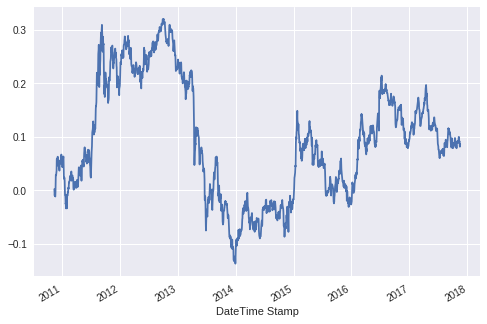

In [ ]:
return_forex.XAUEUR.cumsum().plot();

## CHARLES -> LOAD DATA HERE

In [ ]:
clean_forex = raw_forex.dropna(axis=0, thresh=int(0.9*len(raw_forex.columns)))
clean_forex.columns = map(lambda x: x.replace(' CLOSE Bid Quote', ''), clean_forex.columns)
clean_forex.index = pd.to_datetime(clean_forex.index)
return_forex = clean_forex.pct_change()[1:].fillna(0.0)
#return_forex = np.log(clean_forex).diff()[1:].fillna(0.0)

In [ ]:
return_forex.head()

,XAUEUR,USDNOK,UDXUSD,AUDUSD,USDPLN,NZDUSD,AUDCAD,EURSEK,NZDCAD,USDCAD,...,GBPUSD,XAGUSD,GBPCAD,EURGBP,FRXEUR,EURNOK,UKXGBP,GBPAUD,EURAUD,EURCZK
DateTime Stamp,,,,,,,,,,,,,,,,,,,,,
2010-11-15,0.001927,0.005398,0.000701,-0.001245,0.001709,-0.000080,-0.002209,-0.001891,-0.001079,-0.000888,...,-0.003883,-0.011178,-0.004848,-0.002171,0.000000,-0.000507,0.000000,-0.002657,-0.004880,0.000063
2010-11-16,-0.007396,0.009238,-0.010821,-0.007365,0.013097,-0.004719,0.000582,0.000954,0.003171,0.007905,...,-0.007763,-0.017224,0.000158,0.002250,-0.013791,0.002727,-0.016080,-0.000429,0.001827,-0.000097
2010-11-17,-0.004587,0.001031,-0.003873,0.000322,0.000801,-0.000137,0.004793,0.001039,0.004398,0.004520,...,-0.002672,0.005898,0.001784,0.001217,-0.002511,0.000388,-0.003931,-0.002981,-0.001687,0.000368
2010-11-18,0.003946,-0.008510,0.010522,0.009014,-0.011948,0.009257,0.005848,-0.002479,0.006157,-0.003230,...,0.006134,0.043038,0.003016,0.001397,0.019049,-0.001592,0.014647,-0.002806,-0.001562,0.000364
2010-11-19,-0.004120,-0.000970,0.002136,-0.002293,-0.003962,0.001061,-0.002028,0.001961,0.001361,0.000415,...,0.000665,0.011657,0.000865,0.002918,0.000684,0.002768,-0.006895,0.002894,0.005856,0.001045


In [ ]:
classes_sign = np.sign(return_forex)
#X, y = classes_sign,

In [ ]:
#clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
#clf.fit(X, y)

In [ ]:
#returns.shape

In [ ]:
asset_to_predict= "XAUEUR"
returns = classes_sign


def tailleur(taille0,taille1,Tin,time=False): 
  taille = range(taille0,taille1)
  
  #g_regr=[]
  #x_regr=[]

  acc = 0
  for t0 in taille:
      t1=t0+Tin
      data_in_sample=returns.iloc[t0:t1]
      data_in_sample=data_in_sample.dropna(axis=1)

      what_to_predict=data_in_sample[asset_to_predict].shift(-1).iloc[:-1] # Y

      predictors=data_in_sample
      if(time): 
        predictors["t"]=range(len(predictors))
      lastpredictors=predictors.tail(1)
      predictors=predictors.iloc[0:(len(predictors)-1)]

      myRF=RandomForestRegressor(n_jobs=-1,n_estimators=100).fit(predictors,what_to_predict)
      mypredictions=myRF.predict(lastpredictors)

      x_t=np.sign(mypredictions[0])
      #x_regr.append(x_t)
      #g_regr.append(x_t*returns[asset_to_predict].iloc[t1])
      #print(t1," ",x_t," ",np.nanprod(1+np.array(g_regr))," ",x_t*returns[asset_to_predict].iloc[t1])
      #print(x_t)
      if(x_t == returns[asset_to_predict].iloc[t1]): 
        #t as gagné 
        acc += 1
  print(acc/len(taille),taille0,taille1)
  return acc/len(taille)

In [ ]:
#def try_harder()
best = 0
try_hard_taille0 = [0,100,250,500,1000]
try_hard_taille1 = [100,250,500,750,1250]
offs = [10,50,100,150,300,600,900]
for t0 in try_hard_taille0:
  for t1 in try_hard_taille1: 
    for offset in offs:
      print(offset)
      b1 = tailleur(t0,t1,offset)
      if best < b1: 
        t0_best,t1_best,offset_best = t0,t1,offset

In [ ]:
def one_weighter(taille0,taille1,Tin,returns,time=False): 
  taille = range(taille0,taille1)
  
  #g_regr=[]
  #x_regr=[]
  w = []
  acc = 0
  for t0 in taille:
      t1=t0+Tin
      data_in_sample=returns.iloc[t0:t1]
      data_in_sample=data_in_sample.dropna(axis=1)

      what_to_predict=data_in_sample[asset_to_predict].shift(-1).iloc[:-1] # Y

      predictors=data_in_sample
      if(time): 
        predictors["t"]=range(len(predictors))
      lastpredictors=predictors.tail(1)
      predictors=predictors.iloc[0:(len(predictors)-1)]

      myRF=RandomForestRegressor(n_jobs=-1,n_estimators=100).fit(predictors,what_to_predict)
      mypredictions=myRF.predict(lastpredictors)

      x_t=np.sign(mypredictions[0])
      w_t = mypredictions[0]
      w.append(w_t)
      #x_regr.append(x_t)
      #g_regr.append(x_t*returns[asset_to_predict].iloc[t1])
      #print(t1," ",x_t," ",np.nanprod(1+np.array(g_regr))," ",x_t*returns[asset_to_predict].iloc[t1])
      #print(x_t)
      if(x_t == returns[asset_to_predict].iloc[t1]): 
        #t as gagné 
        acc += 1
  print(acc/len(taille),taille0,taille1)
  return w,acc/len(taille)

In [ ]:
def all_weighter(taille0,taille1,Tin,returns,time=False):
  w = []
  for i in returns.columns: 
    w_i,_ = one_weighter(taille0,taille1,Tin,returns,time)
    w.append(w_i)
  return w

In [ ]:
w = all_weighter(0,100,50,classes_sign,True)

0.52 0 100
0.51 0 100
0.54 0 100
0.52 0 100
0.51 0 100
0.47 0 100
0.51 0 100
0.5 0 100
0.48 0 100
0.53 0 100
0.56 0 100
0.53 0 100
0.53 0 100
0.52 0 100
0.52 0 100
0.52 0 100
0.55 0 100
0.53 0 100
0.53 0 100
0.53 0 100
0.53 0 100
0.57 0 100
0.5 0 100
0.48 0 100
0.51 0 100
0.53 0 100
0.52 0 100
0.54 0 100
0.5 0 100
0.55 0 100
0.56 0 100
0.55 0 100
0.55 0 100
0.52 0 100
0.53 0 100
0.49 0 100
0.57 0 100
0.53 0 100
0.52 0 100
0.53 0 100
0.51 0 100
0.54 0 100
0.51 0 100
0.56 0 100
0.49 0 100
0.56 0 100
0.54 0 100
0.51 0 100
0.53 0 100
0.54 0 100
0.54 0 100
0.52 0 100
0.51 0 100
0.49 0 100
0.54 0 100
0.53 0 100
0.53 0 100
0.46 0 100
0.52 0 100
0.49 0 100
0.51 0 100
0.55 0 100
0.52 0 100
0.54 0 100
0.54 0 100
0.49 0 100


## 1) Portfolio of forex 

In [ ]:
#return_forex = return_forex.groupby(return_forex.index.floor('30d')).apply(lambda x: (1 + x).cumprod()- 1)

In [ ]:
return_forex.head()

,XAUEUR,USDNOK,UDXUSD,AUDUSD,USDPLN,NZDUSD,AUDCAD,EURSEK,NZDCAD,USDCAD,...,GBPUSD,XAGUSD,GBPCAD,EURGBP,FRXEUR,EURNOK,UKXGBP,GBPAUD,EURAUD,EURCZK
DateTime Stamp,,,,,,,,,,,,,,,,,,,,,
2010-11-14 21:00:00,-0.000130,0.002732,-0.001074,-0.001517,0.002192,-0.003233,-0.000702,0.000512,-0.002179,0.000991,...,-0.000310,-0.005692,0.000614,-0.001764,0.000000,0.000528,0.0,0.001286,-0.000576,0.000061
2010-11-15 00:00:00,-0.001472,0.005275,0.000179,-0.006398,0.001598,-0.003633,-0.003315,0.000938,-0.000770,0.002968,...,-0.001798,-0.014565,0.001226,-0.001649,0.000000,0.001877,0.0,0.004580,0.003021,-0.000061
2010-11-15 01:00:00,0.001673,0.000117,0.000179,0.001527,-0.000347,0.001818,0.001408,0.000053,0.001668,0.000000,...,-0.000931,0.003854,-0.001104,0.001061,0.000000,0.000172,0.0,-0.002501,-0.001438,0.000061
2010-11-15 02:00:00,0.000130,0.002042,-0.001433,-0.000305,0.002012,-0.001948,0.000100,0.002533,-0.001411,0.000296,...,-0.001118,-0.001540,-0.000675,0.000471,0.000000,0.001481,0.0,-0.000794,-0.000360,0.000751
2010-11-15 03:00:00,0.002898,0.001236,-0.002513,0.000509,0.000000,0.001429,0.000000,-0.000553,0.000770,-0.000395,...,-0.001431,0.001540,-0.001905,-0.000824,-0.001445,-0.001077,0.0,-0.001897,-0.002738,0.000000


In [ ]:
def find_next_pairs(current, all_pairs, verbose=False):
  held_currencies = list(map(lambda x: x[3:], current))
  next_pairs = list(filter(lambda x: x[:3] in held_currencies, all_pairs))
  if verbose:
    print('Currently holding :', held_currencies)
    print('Available pairs :', next_pairs)
  return next_pairs

In [ ]:
_ = find_next_pairs(['XAUEUR', 'CHFUSD'], return_forex.columns.values, verbose=True)

Currently holding : ['EUR', 'USD']
Available pairs : ['USDNOK', 'USDPLN', 'EURSEK', 'USDCAD', 'USDSGD', 'EURHUF', 'USDCZK', 'USDTRY', 'USDMXN', 'USDZAR', 'USDDKK', 'USDJPY', 'EURCHF', 'EURDKK', 'USDCHF', 'EURCAD', 'EURPLN', 'EURNZD', 'EURUSD', 'EURJPY', 'EURTRY', 'USDHKD', 'USDSEK', 'USDHUF', 'EURGBP', 'EURNOK', 'EURAUD', 'EURCZK']


In [ ]:
rolled_return = return_forex.rolling(7).mean()

In [ ]:
def portfolio_performance(weights, returns, title, log_ret=False):
  """
  in sample: portfolio weights computed for time t are used with returns at time t
  out sample: portfolio weights computed for time t are used with returns at time t + 1
  
  In other words, for the out sample, the returns of the portfolio at time t+1 is calculated
  by using the 'optimum' weights for time t and assuming that the return at time
  t+1 is assumed to be the same as at time t
  """
  
  if log_ret:
    portfolio_returns = np.log(weights.multiply(np.exp(rolled_return)).dropna().sum(axis=1))
    insample_returns = np.log(weights.shift(-1).multiply(np.exp(rolled_return)).dropna().sum(axis=1))
    
    performance = 1 + portfolio_returns.cumsum()
    insample_performance = 1 + insample_returns.cumsum()
  else:
    portfolio_returns = weights.multiply(rolled_return).dropna().sum(axis=1)
    insample_returns = weights.shift(-1).multiply(rolled_return).dropna().sum(axis=1)
    
    performance = (1 + portfolio_returns).cumprod()
    insample_performance = (1 + insample_returns).cumprod()
    
  performance.name = title
  
  plt.figure(figsize=(10, 10))

  plt.subplot(211)
  plt.title(title)
  plt.ylabel('Portfolio returns')
  portfolio_returns.plot()

  plt.subplot(212)
  plt.ylabel('Cumulative returns')
  performance.plot(legend = True)
  insample_performance.name = 'in sample'
  insample_performance.plot(legend = True)
  return performance

### 1.1) equally weighted

In [ ]:
window = 90

In [ ]:
equal_weight = rolled_return.apply(lambda x:pd.Series([1./rolled_return.shape[1]]*rolled_return.shape[1]), axis=1)
equal_weight.columns = rolled_return.columns
equal_weight.sum(axis=0).sum()

2170.000000000054

In [ ]:
rolled_return.iloc[window:].head()

,XAUEUR,USDNOK,UDXUSD,AUDUSD,USDPLN,NZDUSD,AUDCAD,EURSEK,NZDCAD,USDCAD,...,GBPUSD,XAGUSD,GBPCAD,EURGBP,FRXEUR,EURNOK,UKXGBP,GBPAUD,EURAUD,EURCZK
DateTime Stamp,,,,,,,,,,,,,,,,,,,,,
2011-03-01,0.000663,-0.002384,-0.002157,0.000901,0.000029,-0.002322,-0.000737,-0.000877,-0.003995,-0.001640,...,0.000531,0.003262,-0.001107,0.000940,-0.002282,-0.000948,-0.002387,-0.000373,0.000560,-0.000584
2011-03-02,0.001458,-0.003012,-0.002326,0.001873,-0.001543,-0.001208,-0.000106,-0.000915,-0.003183,-0.001960,...,0.001281,0.006820,-0.000702,0.000688,-0.001703,-0.001019,-0.001604,-0.000599,0.000077,-0.001217
2011-03-03,-0.000358,-0.001839,0.000363,0.001730,-0.001385,-0.000762,-0.000667,-0.000128,-0.003158,-0.002421,...,0.000534,0.004830,-0.001855,0.001261,0.000193,-0.000149,0.001223,-0.001182,0.000112,-0.001584
2011-03-04,-0.000523,-0.001088,0.001720,0.000595,-0.001861,-0.002068,-0.001072,0.000532,-0.003728,-0.001692,...,0.000945,0.007830,-0.000717,0.000958,0.000162,0.000847,0.002274,0.000358,0.001290,-0.001464
2011-03-06,0.000887,-0.001767,0.000337,-0.000003,-0.002071,-0.002452,-0.001215,0.000777,-0.003668,-0.001201,...,0.001372,0.013138,0.000169,0.000713,-0.001874,0.000317,0.000397,0.001380,0.002109,-0.001383


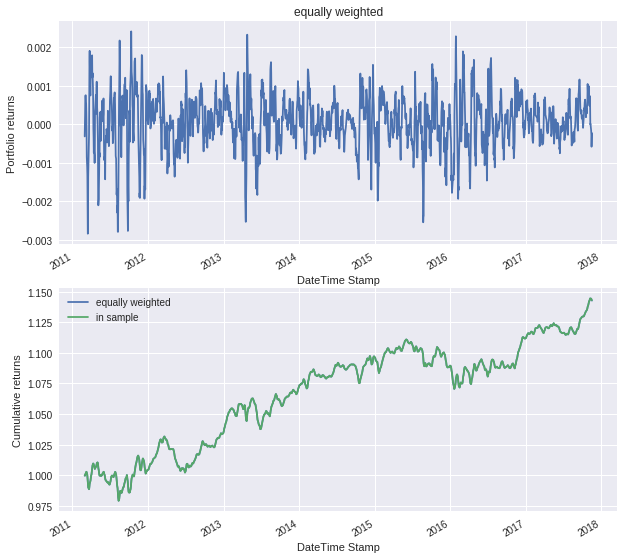

In [ ]:
performance_ew = portfolio_performance(equal_weight[window:], rolled_return, 'equally weighted', log_ret=True)

### 1.2) Minimum variance

In [ ]:
covariance = rolled_return.shift(1).rolling(window).cov().dropna(axis=0)

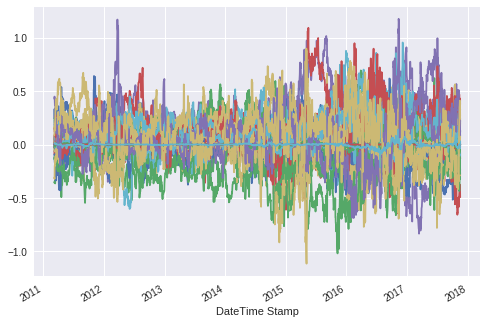

In [ ]:
def w_min(x, series=True):
    sigma_inv = np.linalg.inv(x)
    ones = np.ones([len(sigma_inv), 1])
    res = sigma_inv @ ones /(ones.T @ sigma_inv @ ones)
    if series:
        return pd.Series(res.flatten())
    else : 
        return res.flatten()

global_minimum_variance = covariance.groupby(level=0).apply(w_min)
global_minimum_variance.columns = return_forex.columns

global_minimum_variance.plot(legend=False);

In [ ]:
global_minimum_variance.sum(axis=1).sum() == len(global_minimum_variance)

True

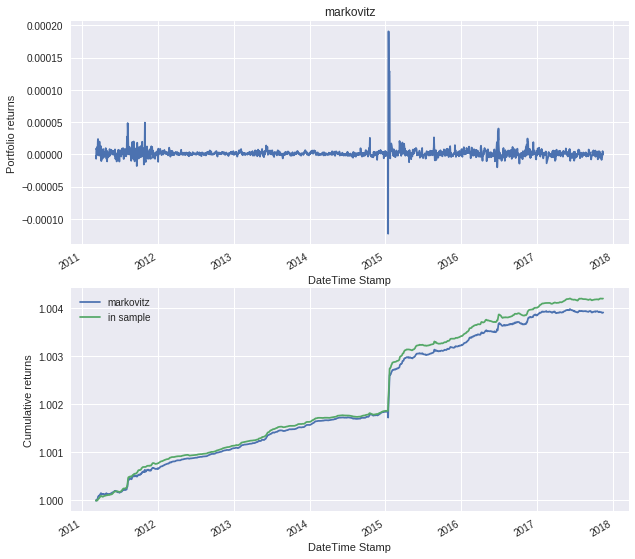

In [ ]:
performance_markovitz = portfolio_performance(global_minimum_variance, rolled_return, 'markovitz', log_ret=True)

#markoviz_returns = global_minimum_variance.multiply(rolled_return).sum(axis=1)
#markoviz_returns.plot(legend=False)

### 1.3) Risk parity

In [ ]:
stds = rolled_return.shift(1).rolling(window).std().dropna()

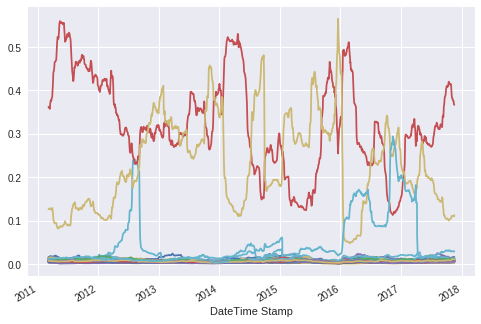

In [ ]:
risk_parity = 1./stds
risk_parity = risk_parity.div(risk_parity.sum(axis=1), axis=0)
risk_parity.plot(legend=False);

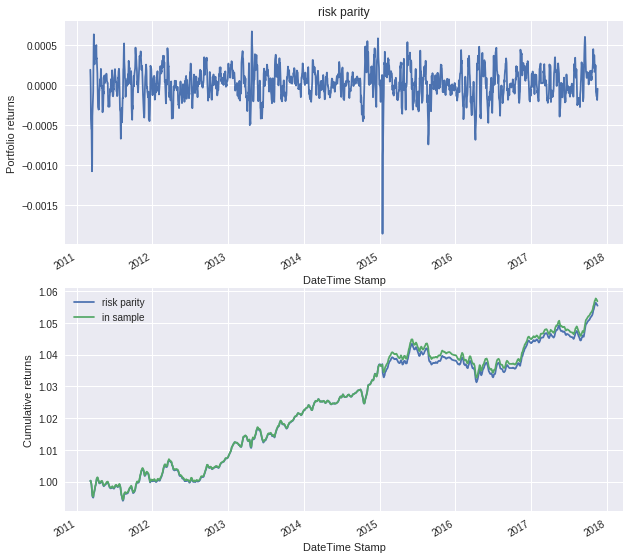

In [ ]:
performance_rp = portfolio_performance(risk_parity, rolled_return, 'risk parity', log_ret=True)

#rp_returns = risk_parity.multiply(rolled_return).sum(axis=1)

### 1.4) Strategies comparison

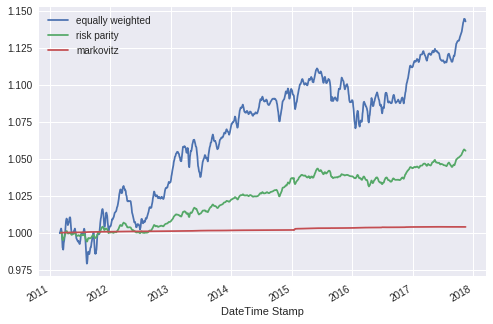

In [ ]:
strategies = pd.concat([performance_ew, performance_rp, performance_markovitz], axis = 1)
strategies.plot()

In theory, we know that the risk parity and mean variance portfolio should outperform the equally weighted portfolio.

In practice, the equally weighted uses no knowledge of historical returns, risk parity uses the standard deviation of the returns, and the minimum variance uses the more data as it need to compute the covariance matrix of the pair of currencies. Therefore, we can see that the poorest strategies are the one that use the most data, and therefore are prone to fit more noise.

## 2) Correlation matrix cleaning

In [ ]:
N = rolled_return.shape[1]
T = window
q = N/T
correlation = rolled_return.shift(1).rolling(window).corr().dropna(axis=0)
C = correlation.loc[correlation.index.get_level_values(0).unique()[-1]] #taking the last correlation matrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


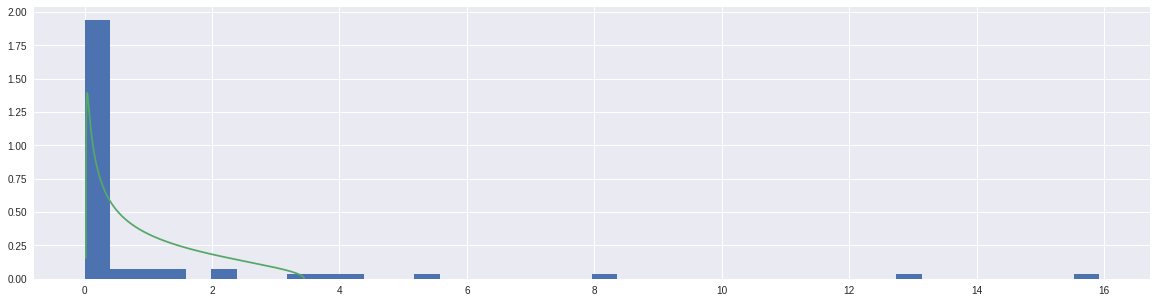

In [ ]:
lambda_, V = np.linalg.eig(C)

lp = (1 + np.sqrt(q))**2
lm = (1- np.sqrt(q))**2

S= lambda x :1/(q*2*np.pi)*np.sqrt((lp - x)*(x - lm))/x

plt.figure(figsize=(20, 5))
plt.hist(lambda_, bins=40, normed=True)
x = np.arange(0, 5, 0.0001)
plt.plot(x, S(x))

It looks like deviation from RMT is really minimum, suggesting that our data is really noisy.

### 2.1) MVP with eigenvalue clipping

In [ ]:
def corr_clipping(C):
  d = 0.5

  lambda_, V = np.linalg.eig(C)

  lp = (1 + np.sqrt(q))**2
  lm = (1- np.sqrt(q))**2

  lambda_[lambda_ < lp] = d #clipping eigenvalues

  clipped = V.T @ np.diag(lambda_) @ V

  np.fill_diagonal(clipped, 1)

  return pd.DataFrame(clipped, columns=C.columns, index=C.index)

In [ ]:
clipped_correlation = correlation.groupby(level=0).apply(corr_clipping)

In [ ]:
clipped_covariance = pd.DataFrame()
for name, group in correlation.groupby(level=0):
  std = stds.loc[name].values
  new_cov = group.multiply(std @ std.T)
  clipped_covariance = pd.concat([clipped_covariance, new_cov], axis=0)

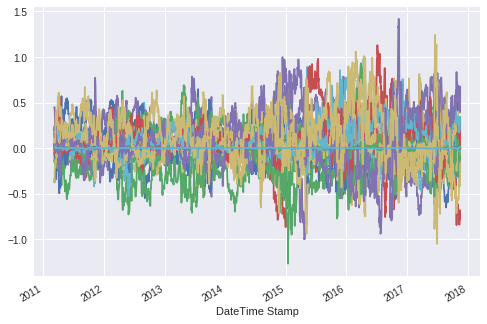

In [ ]:
mvp_clipped = clipped_covariance.groupby(level=0).apply(w_min)
mvp_clipped.columns = rolled_return.columns
mvp_clipped.plot(legend=False)

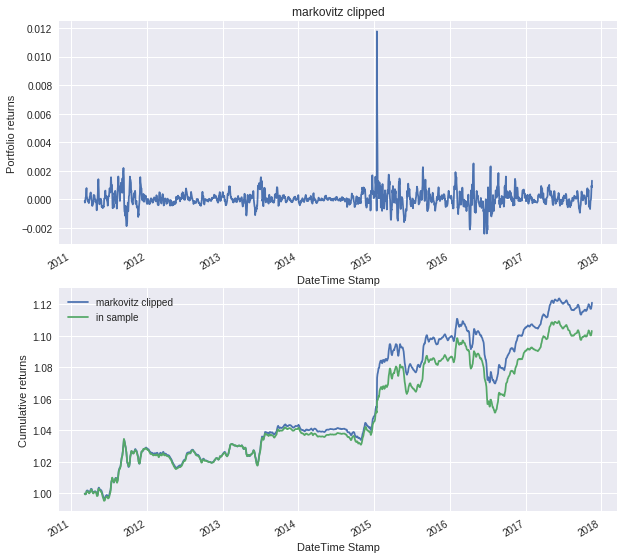

In [ ]:
performance_clipped = portfolio_performance(mvp_clipped, rolled_return, 'markovitz clipped', log_ret=True)

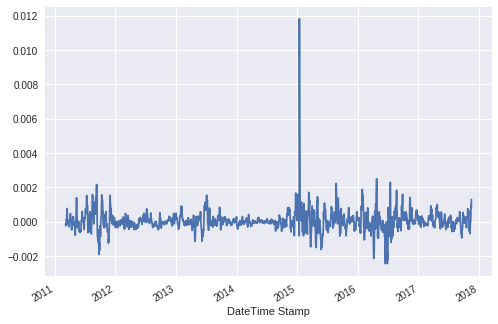

In [ ]:
clipped_returns = mvp_clipped.multiply(rolled_return).dropna().sum(axis=1)
clipped_returns.plot()

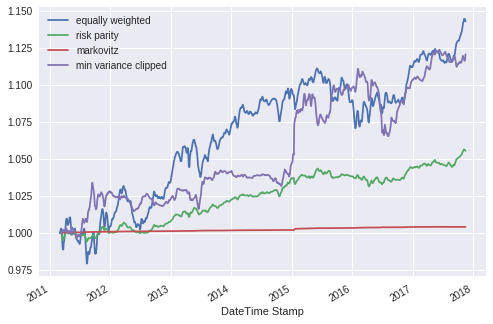

In [ ]:
performance_clipped = (1 + clipped_returns).cumprod()
performance_clipped.name = 'min variance clipped'
strategies = pd.concat([strategies, performance_clipped], axis=1)
strategies.plot()

### 2.2) pyRMT clipping

In [ ]:
window = 90

rolled_return_adj = rolled_return.shift(1).dropna()

def get_weight(returns, rmt_fun, window):
  weight = pd.DataFrame()

  for i in range(len(returns) - window):
    current = returns.iloc[i:i+window]
    cov = rmt_fun(current)
    weight = pd.concat([weight, pd.DataFrame(w_min(cov), columns=[current.iloc[-1].name]).transpose()], axis=0)
  
  weight.columns = returns.columns
  return weight

clipped_weight = get_weight(rolled_return_adj, pyRMT.clipped, window)

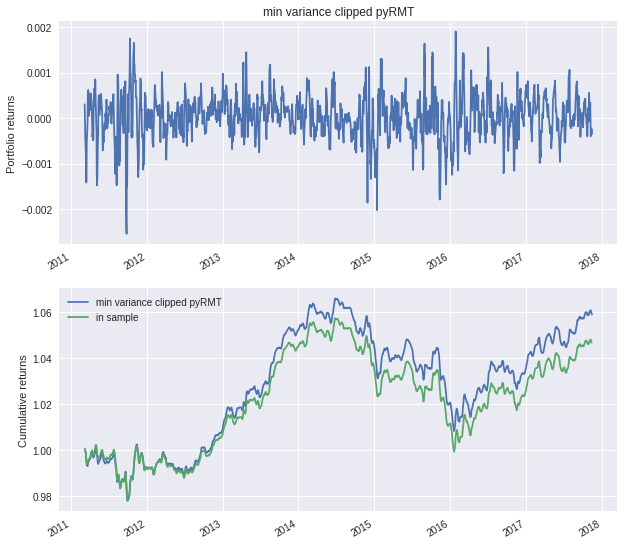

In [ ]:
performance_clipped = portfolio_performance(clipped_weight, rolled_return, 'min variance clipped pyRMT', log_ret=True)

###  2.3) pyRMT shrinking

In [ ]:
shrinked_weight = get_weight(rolled_return_adj, pyRMT.optimalShrinkage, window)

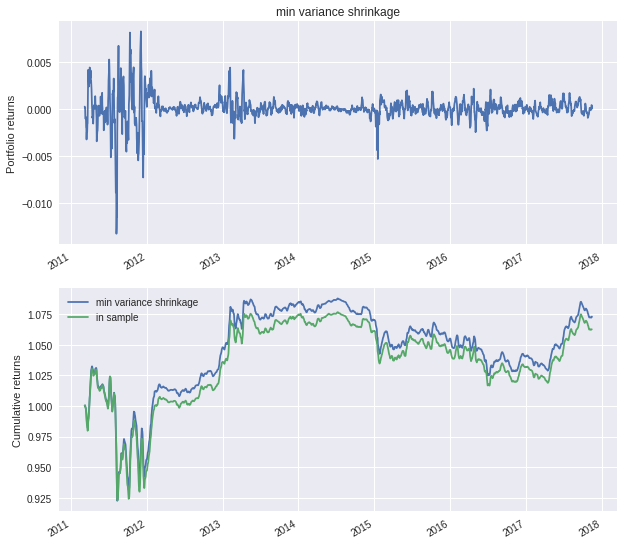

In [ ]:
performance_shrink = portfolio_performance(shrinked_weight, rolled_return, 'min variance shrinkage', log_ret=True)

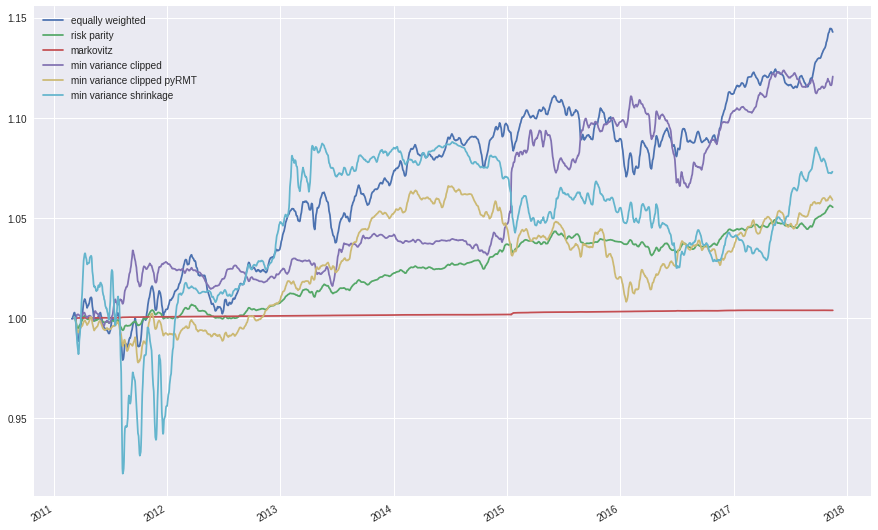

In [ ]:
strategies_rmt = pd.concat([strategies, performance_clipped, performance_shrink], axis=1)
strategies_rmt.plot(figsize=(15, 10));

## 3) Alternative strategy

For each day, make forecast of price with an horizon of 7 days using LSTM.
The idea is to use those extra 7 days to compute a forecasted covariance matrix of the assets and plug it into the different portfolio stratgies done above.

The predictions are computed as such, we take a rolling window of the previous month's prices and for each window train an lstm, then we make the 7 days forecast for the last day of the window.

The training is done the following way for each window:
- take a sub rolling window of 15 days of prices, each sample will correspond to a sequence as input to the lstm
- for each sample, take the following 7 days, this will correspond to the targets
- take the last pair of input, target, 

In [5]:
def small_lstm(window):
    model = nn.Sequential(
      nn.LSTM(input_size=window, hidden_size=100, num_layers=2),
      nn.LSTM(input_size=100, hidden_size=10, num_layers=2),
      nn.Linear(32, 1)
    )
    return model

class bigLSTM(nn.Module):

    def __init__(self, input_dim, hidden_dim, batch_size, output_dim=1,
                    num_layers=2):
        super(bigLSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers

        # Define the LSTM layer
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers, batch_first=True)

        # Define the output layer
        self.linear = nn.Linear(self.hidden_dim, output_dim)

    def init_hidden(self):
        # This is what we'll initialise our hidden state as
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))

    def forward(self, input):
        # Forward pass through LSTM layer
        # shape of lstm_out: [input_size, batch_size, hidden_dim]
        # shape of self.hidden: (a, b), where a and b both 
        # have shape (num_layers, batch_size, hidden_dim).
        lstm_out, self.hidden = self.lstm(input.view(len(input), self.batch_size, -1))
        
        # Only take the output from the final timetep
        # Can pass on the entirety of lstm_out to the next layer if it is a seq2seq prediction
        y_pred = self.linear(lstm_out[-1].view(self.batch_size, -1))
        return y_pred.view(-1)


In [6]:
def train_model(model, inputs, labels, tofit, optimizer, criterion, batch_size):
  
  #model.hidden = model.init_hidden()
  
    for i in range(epoch):
        for j, data in enumerate(inputs):
            data = data.unsqueeze(0)

            #if use_gpu:
            #    inputs, labels = inputs.cuda(), labels.cuda()

            optimizer.zero_grad()

            outputs = model(data)

            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            #with torch.no_grad():  
            #print('L1 loss :', loss.data.item(), flush=True)

          
    with torch.no_grad():
        model.eval()
        fitted = model(tofit)

    return fitted.data.numpy()

In [7]:
def forecast_asset(asset_to_predict, returns, window, batch_size, horizon):
    dataset = pd.DataFrame(columns=np.arange(horizon))

    for t0 in tqdm(range(0, len(returns)-window)):

        model.hidden = model.init_hidden()


        t1 = t0 + window

        data_in_sample=returns.iloc[t0:t1]
        data_in_sample=data_in_sample.fillna(axis=1, method='ffill')

        #train_label=data_in_sample[asset_to_predict].shift(-1).iloc[:-1] # Y

        predictors=data_in_sample[asset_to_predict]

        #if(time): 
        #  predictors["t"]=range(len(predictors))

        #lastpredictors=predictors.tail(1)
        #predictors=predictors.iloc[0:-1]

        data_input = np.array([predictors.values[i:i + batch_size] for i in range(window-batch_size-horizon)])

        if horizon > 1:
            data_label = np.array([predictors.values[i + batch_size :i + batch_size + horizon] for i in range(window-batch_size-horizon)]) ## TODO forecast 7 day
        else:
            data_label = predictors.values[batch_size:]

        train_input = data_input[:-1]
        train_label = data_label[:-1]
        tofit = data_input[-1]


        inputs = torch.Tensor(train_input).unsqueeze(2)
        labels = torch.Tensor(train_label)

        tofit = torch.Tensor(tofit).unsqueeze(0).unsqueeze(2)

        if use_gpu:
            inputs = inputs.cuda()
            labels = labels.cuda()
            tofit = tofit.cuda()

        result = train_model(model, inputs, labels, tofit, optimizer, criterion, batch_size)

        dataset.loc[predictors.index.values[-horizon]]=result

    dataset.columns = pd.MultiIndex.from_product([[asset_to_predict], dataset.columns])

    return dataset

In [13]:
clean_forex.columns[43]

'CHFJPY'

In [94]:
old_bad_tick = ['XAUCHF','XAUUSD','GBPNZD','XAUAUD','GBPJPY','EURDKK','CADJPY','EURUSD','EURJPY','USDHKD','USDHKD','GBPUSD','EURGBP','EURNOK']
bad_tick = ['XAUCHF','EURDKK','USDHKD']

In [95]:
window = 60
returns = clean_forex

length_train = 15
horizon = 7

h1 = 32
num_layers = 2
learning_rate = 1e-2
dtype = torch.float

model = bigLSTM(length_train, h1, batch_size=1, output_dim=horizon, num_layers=num_layers)

epoch = 2
use_gpu = torch.cuda.is_available()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.L1Loss()


use_gpu = torch.cuda.is_available()

#for i, asset_to_predict in enumerate(clean_forex.columns[25:33]):
asset_to_predict=bad_tick[0]#'XAUEUR'#clean_return.columns[current]
#print(str(i+43)+' current: ' + asset_to_predict)
prediction = forecast_asset(asset_to_predict, returns, window, length_train, horizon)

filename = 'lstm_' + str(horizon) + '_' + asset_to_predict + '.csv'

#files.download(filename)



  0%|          | 0/2111 [00:00<?, ?it/s]

  0%|          | 1/2111 [00:00<05:35,  6.28it/s]

  0%|          | 2/2111 [00:00<05:35,  6.28it/s]

  0%|          | 3/2111 [00:00<05:16,  6.66it/s]

  0%|          | 4/2111 [00:00<05:13,  6.72it/s]

  0%|          | 5/2111 [00:00<05:06,  6.88it/s]

  0%|          | 6/2111 [00:00<05:06,  6.87it/s]

  0%|          | 7/2111 [00:01<05:17,  6.63it/s]

  0%|          | 8/2111 [00:01<05:08,  6.82it/s]

  0%|          | 9/2111 [00:01<05:12,  6.73it/s]

  0%|          | 10/2111 [00:01<05:12,  6.73it/s]

  1%|          | 11/2111 [00:01<05:16,  6.64it/s]

  1%|          | 12/2111 [00:01<05:17,  6.61it/s]

  1%|          | 13/2111 [00:01<05:26,  6.43it/s]

  1%|          | 14/2111 [00:02<05:41,  6.14it/s]

  1%|          | 15/2111 [00:02<05:45,  6.06it/s]

  1%|          | 16/2111 [00:02<05:34,  6.27it/s]

  1%|          | 17/2111 [00:02<05:43,  6.09it/s]

  1%|          | 18/2111 [00:02<05:30,  6.33it/s]

  1%|          | 19/2111 [00:02<05:37,  6.20it/

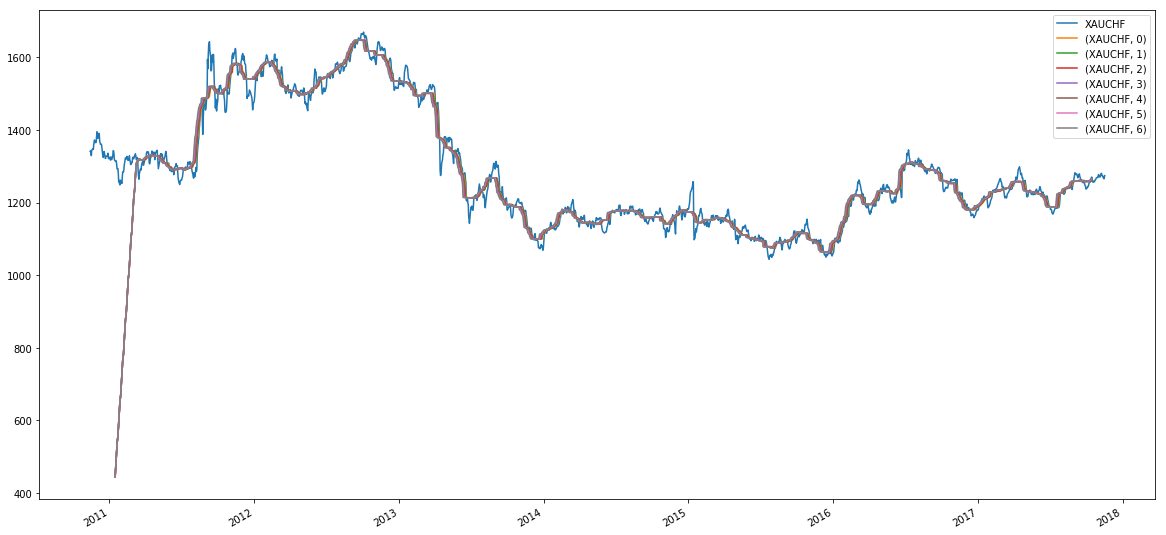

In [96]:
pd.concat([clean_forex[asset_to_predict], prediction.shift(-15-7)], axis=1).plot(figsize=(20, 10))

In [97]:
prediction.to_csv(filename)

### Predictions

In [99]:
list_lstm_predictions = glob.glob('./data/lstm_*')
len(list_lstm_predictions)

66

In [100]:
prediction_df = pd.DataFrame()
for file in list_lstm_predictions:
    current_df = pd.read_csv(file, index_col=0, header=[0,1])
    prediction_df = pd.concat([prediction_df, current_df], axis=1)

In [101]:
prediction_df.to_csv('forex_lstm_horizon7.csv')

In [23]:
stock_indexes = ["SPXUSD","JPXJPY","NSXUSD","FRXEUR","UDXUSD","UKXGBP","GRXEUR","AUXAUD","HKXHKD","ETXEUR","WTIUSD"]

clean_prediction = prediction_df.drop(columns=stock_indexes)

//anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [26]:
clean_prediction.to_csv('clean_lstm_horizon7_forex.csv')

In [ ]:
xgb_forex = pd.read_csv('https://raw.githubusercontent.com/palexlee/projectFBD/master/xgb_forex.csv', index_col=[0])
xgb_forex.index = pd.to_datetime(xgb_forex.index)

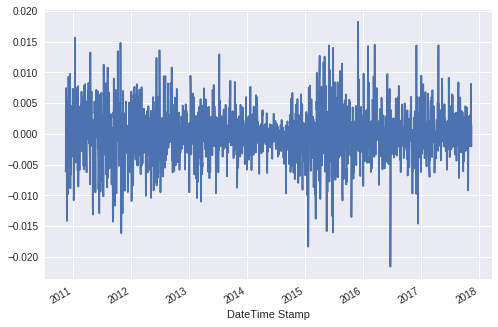

In [66]:
clean_forex['EURUSD'].pct_change().plot()

In [ ]:
files.download(filename)